# Loading Dataset - Titanic

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
dataset = pd.read_csv('bstDataset.csv')
dataset

,jenis kelamin,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji,bst
0,L,40,menikah,4,1,1450000,0
1,L,55,menikah,3,1,700000,1
2,L,43,menikah,4,2,1600000,0
3,L,49,menikah,3,1,800000,0
4,L,50,menikah,5,3,1200000,1
5,P,67,tidak menikah,1,0,500000,1
6,P,45,tidak menikah,3,2,650000,1
7,L,30,menikah,3,1,4500000,0
8,P,54,tidak menikah,2,1,950000,1
9,L,54,menikah,4,2,1250000,1


In [138]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [139]:
inputs = dataset.drop('bst',axis='columns')
target = dataset.bst

In [140]:
dummies = pd.get_dummies(inputs['jenis kelamin'])
dummies

,L,P
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,1,0


In [141]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,jenis kelamin,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,P
0,L,40,menikah,4,1,1450000,1,0
1,L,55,menikah,3,1,700000,1,0
2,L,43,menikah,4,2,1600000,1,0


In [142]:
inputs.drop(['jenis kelamin','P'],axis='columns',inplace=True)
inputs.head()

,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji,L
0,40,menikah,4,1,1450000,1
1,55,menikah,3,1,700000,1
2,43,menikah,4,2,1600000,1
3,49,menikah,3,1,800000,1
4,50,menikah,5,3,1200000,1


In [143]:
dummies = pd.get_dummies(inputs['status pernikahan'])
dummies

,menikah,tidak menikah
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,1,0


In [145]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,menikah,tidak menikah,menikah,tidak menikah
0,40,menikah,4,1,1450000,1,1,0,1,0
1,55,menikah,3,1,700000,1,1,0,1,0
2,43,menikah,4,2,1600000,1,1,0,1,0


In [146]:
inputs.drop(['status pernikahan','tidak menikah'],axis='columns',inplace=True)
inputs.head()

,umur,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,menikah,menikah
0,40,4,1,1450000,1,1,1
1,55,3,1,700000,1,1,1
2,43,4,2,1600000,1,1,1
3,49,3,1,800000,1,1,1
4,50,5,3,1200000,1,1,1


In [150]:
print(type(inputs))

<class 'pandas.core.frame.DataFrame'>


In [163]:
X_train = inputs[:-6]
y_train = target[:-6]
x_test = inputs[-6:]
y_test = target[-6:]

In [160]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [167]:
X_train

,umur,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,menikah,menikah
0,40,4,1,1450000,1,1,1
1,55,3,1,700000,1,1,1
2,43,4,2,1600000,1,1,1
3,49,3,1,800000,1,1,1
4,50,5,3,1200000,1,1,1
5,67,1,0,500000,0,0,0
6,45,3,2,650000,0,0,0
7,30,3,1,4500000,1,1,1
8,54,2,1,950000,0,0,0
9,54,4,2,1250000,1,1,1


In [165]:
print(type(X_test))

<class 'numpy.ndarray'>


In [155]:
y_test

14    1
15    0
16    0
17    0
18    0
19    1
Name: bst, dtype: int64

In [168]:
X_train = X_train.values
y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values

In [169]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

AttributeError: 'Series' object has no attribute 'reshape'

In [170]:
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (7, 14)
Shape of y_train :  (1, 14)
Shape of X_test :  (6, 6)
Shape of y_test :  (6,)


In [171]:
print(X_train)

[[     40      55      43      49      50      67      45      30      54
       54      37      25      49      41]
 [      4       3       4       3       5       1       3       3       2
        4       4       1       3       4]
 [      1       1       2       1       3       0       2       1       1
        2       2       0       1       2]
 [1450000  700000 1600000  800000 1200000  500000  650000 4500000  950000
  1250000 1300000 1700000  600000 1000000]
 [      1       1       1       1       1       0       0       1       0
        1       1       1       0       1]
 [      1       1       1       1       1       0       0       1       0
        1       1       0       0       1]
 [      1       1       1       1       1       0       0       1       0
        1       1       0       0       1]]


# Logistic Regression Overview :

## Equations :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = single$  $weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( W^T*X + b ) $    ........ (probabilistic predictions of shape (1 x m ) )

<img src = "sigmoid.png" width = 400px>


## Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

## Gradient Descent 

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n) 

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $


<img src = "gradient-descent.png" width = 300px>

# Model

In [81]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [82]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [31]:
iterations = 100000
learning_rate = 0.0005
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

ValueError: operands could not be broadcast together with shapes (14,) (1,6) 

### Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

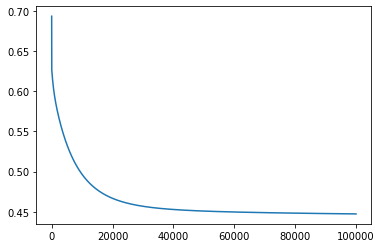

In [12]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

# Testing Model Accuracy

In [15]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [16]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  91.39 %


**Our model accuracy is 91 % on Test dataset. Which is pretty good. !**


## Subscribe to Coding Lane : https://www.youtube.com/channel/UCJFAF6IsaMkzHBDdfriY-yQ?sub_confirmation=1